In [1]:
import sklearn
import pandas as pd
import numpy as np

df = pd.read_csv('ccdefault.csv',header=None)
df.dropna()
X=df.iloc[1:, 1:-1]
y=df.iloc[1:, -1]
df.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [2]:
# train-test split
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (24000, 23)
Shape of y_train:  (24000,)
Shape of X_test:  (6000, 23)
Shape of y_test:  (6000,)


In [47]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

rmse_test = []
ran = []
test_acc = []
for n in range(10,110,10):
    rf = RandomForestClassifier(n_estimators=n,
            random_state=2)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    test_acc.append(np.mean(cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1)))
    rmse_test.append((MSE(y_test, y_pred))**0.5)
    ran.append(n)


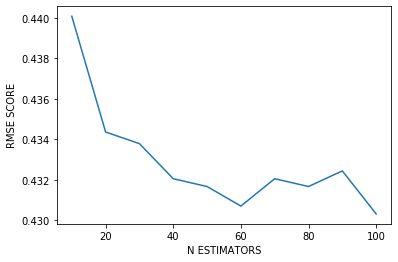

In [48]:
import matplotlib.pyplot as plt

plt.plot(ran, rmse_test)
plt.xlabel('N ESTIMATORS')
plt.ylabel('RMSE SCORE')
plt.show()

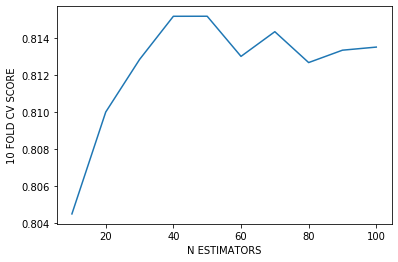

In [50]:
import matplotlib.pyplot as plt

plt.plot(ran, test_acc)
plt.xlabel('N ESTIMATORS')
plt.ylabel('10 FOLD CV SCORE')
plt.show()

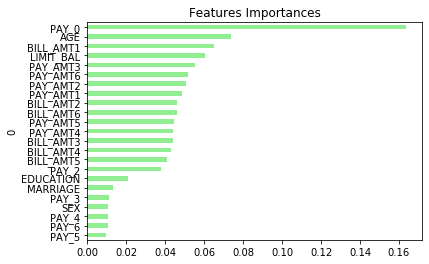

In [51]:
#use the best n_estimators= 50
rf = RandomForestRegressor(n_estimators=50,
            random_state=2)
rf.fit(X_train,y_train)

# Create a pd.Series of features importances     
X_train =  pd.DataFrame(X_train)

importances = pd.Series(data=rf.feature_importances_,
                        index= df.iloc[0, 1:-1]  )
# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [38]:
print("IMPORTANCE RANKING")

print(importances.sort_values(ascending = False))


IMPORTANCE RANKING
0
PAY_0        0.163300
AGE          0.073323
BILL_AMT1    0.065029
LIMIT_BAL    0.060329
PAY_AMT3     0.055212
PAY_AMT6     0.051047
PAY_AMT2     0.050455
PAY_AMT1     0.048405
BILL_AMT2    0.046964
BILL_AMT6    0.046081
PAY_AMT5     0.044862
PAY_AMT4     0.043583
BILL_AMT3    0.043397
BILL_AMT4    0.042794
BILL_AMT5    0.041365
PAY_2        0.037660
EDUCATION    0.020965
MARRIAGE     0.012960
SEX          0.010931
PAY_3        0.010866
PAY_4        0.010622
PAY_6        0.010615
PAY_5        0.009235
dtype: float64


In [39]:
print("My name is JIE QIAN")
print("My NetID is: jieqian2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is JIE QIAN
My NetID is: jieqian2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
